## Lab 3: 
## 7/14/2021
## Shawn Meng

## 1. Suppose 2% of the population of people over age 50 has disease X.  A machine learning algorithm has been developed to detect this disease in individuals. When run on a person, it correctly flags the person as having X 90% of the time. It incorrectly flags someone as having X 15% of the time.
## An individual takes the test. The result is the person has disease X. What is the probability the person actually has disease X?

using Bayes's theorem
We want to find P(Disease|positive) the probability of a person has the disease given him tested positive.
P(Disease|positive) = P(positive|Disease) * P(Disease) / P(positive)

P(Disease) the overall positive rate for the entire population is given as 2%
P(positive|Disease) the probability of testing positive a person with disease is given as 90%
We need to find P(positive) the probability of testing positive for the entire population

Suppose the population with disease is 1, the population without disease is x
Since FPR is 15%, FP = 0.15 * x
Since P(Disease) = 2%, 1 / (1+x) = 2% ==> x = 49

So P(positive) = (TP + FP) / (disease+no_disease) = (0.9 + 0.15 * x) / (1 + x) = (0.9 + 0.15 * 49) /50 = 0.165

Then P(Disease|positive) = P(positive|Disease) * P(Disease) / P(positive)
                         = 0.9 * 0.02 / 0.165   
                         = ～0.109
                         
If the person tested positive, the probability of the person has the disease is about 10.9%.

In [2]:
(0.9 * 0.02) / ((0.9 + 0.15 * 49) / 50)

0.1090909090909091

## 2. Using the same dataset as Assignment2 and using a random forest, pick any of the possible hyperparameters. Try at least 10 values of this hyperparameter, while keeping the remaining hyperparameters constant. For each of the 10 values, train a random forest model. For each model, calculate the AUC on the training set and on the validation set. Which model performs the best? What do you notice the performance when you vary  the hyperparameters?

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
## same codes from assignment 2
df1 = pd.read_csv("dataset-of-00s.csv")
train_set, val_set = train_test_split(df1, train_size = 0.7, random_state = 9660)

train_y = train_set.target
val_y = val_set.target

train_x = train_set.drop(['target','uri','artist'], axis = 1)
val_x = val_set.drop(['target','uri','artist'], axis = 1)

train_x["track_len"] = [len(x) for x in train_x["track"]]
val_x['track_len'] = [len(x) for x in val_x['track']]

train_x = train_x.drop('track', axis = 1)
val_x = val_x.drop('track', axis = 1)

In [44]:
## setting up constant hyperparameters, using the optimal values found by the random forest model in assignment 2
## choose max_samples as the hyperparameter to tune.
params = {'max_depth':[7],
         'n_estimators' : [150],
         'min_samples_split':[10],
         'min_samples_leaf':[10],
         'max_features':[4],
         'max_samples':[0.16, 0.17, 0.18, 0.19, 0.2, 0.21,0.22,0.23,0.24,0.5,0.6,0.7,0.8,0.9]}

## the optimal hyperparameter for max_samples was 0.2. Try more around this number as well as some number out of the original range.

max_samples_list = [0.16, 0.17, 0.18, 0.19, 0.2, 0.21,0.22,0.23,0.24,0.5,0.6,0.7,0.8,0.9]

In [6]:
## 14 values to be tuned.
len(max_samples_list)

14

In [108]:
##def a function for logistic model evaluation. reused code from assignment 2
def tree_eva(x,y,model,train_val):
    name = str(train_val)+"_"
    yhat = model.predict(x)
    prob = model.predict_proba(x)
    accuracy = metrics.accuracy_score(y, yhat)
    precision = metrics.precision_score(y, yhat)
    recall = metrics.recall_score(y, yhat)
    fpr, tpr, threshold = metrics.roc_curve(y, prob[:,1], pos_label=1)
    auc = metrics.auc(fpr, tpr)
    f1 = metrics.f1_score(y, yhat)
    value_list = [accuracy, precision, recall, auc, f1]
    name_list = ['accuracy','precision','recall','auc', 'F1_score']
    df = pd.DataFrame(zip(name_list, value_list), columns=['metric','value'])
    plt.plot(fpr, tpr)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot([0, 1], [0, 1], color = 'black', linestyle = "dashed")
    plt.title(str(train_val)+" set ROC")
    plt.show()
    return df

In [36]:
## fiting models with the values in the max_samples_list

rf_1 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[0], n_jobs =2, random_state = 9660)
rf_1.fit(train_x, train_y)

RandomForestClassifier(max_depth=7, max_features=4, max_samples=0.16,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=150, n_jobs=2, random_state=9660)

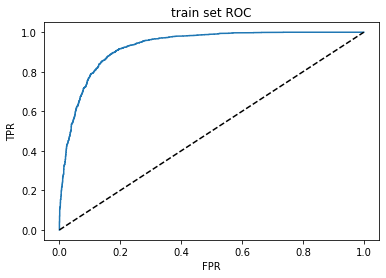

,metric,value
0,accuracy,0.86034
1,precision,0.83104
2,recall,0.90663
3,auc,0.92869
4,F1_score,0.86719


In [109]:
## evaluation for train set
rf1_train_df = tree_eva(x = train_x, y = train_y, model = rf_1, train_val = 'train')
rf1_train_df

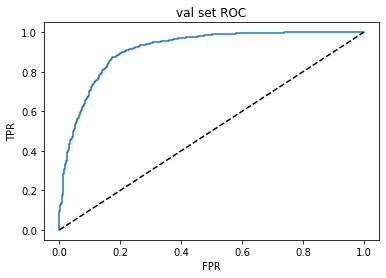

,metric,value
0,accuracy,0.84506
1,precision,0.81106
2,recall,0.89413
3,auc,0.91363
4,F1_score,0.85057


In [51]:
## evaluation for val set
rf1_val_df = tree_eva(x = val_x, y = val_y, model = rf_1, train_val = 'val')
rf1_val_df 

In [52]:
rf_2 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[1], n_jobs =2, random_state = 9660)
rf_2.fit(train_x, train_y)

RandomForestClassifier(max_depth=7, max_features=4, max_samples=0.17,
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=150, n_jobs=2, random_state=9660)

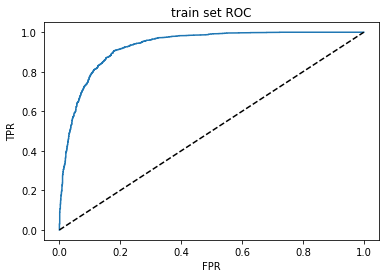

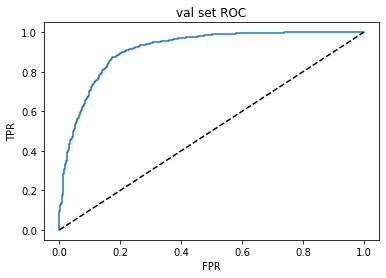

,metric,value
0,accuracy,0.84506
1,precision,0.81106
2,recall,0.89413
3,auc,0.91363
4,F1_score,0.85057


In [55]:
## evaluation for train set
rf2_train_df = tree_eva(x = train_x, y = train_y, model = rf_2, train_val = 'train')
rf2_train_df
## evaluation for val set
rf2_val_df = tree_eva(x = val_x, y = val_y, model = rf_1, train_val = 'val')
rf2_val_df 

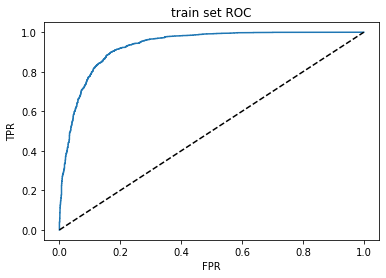

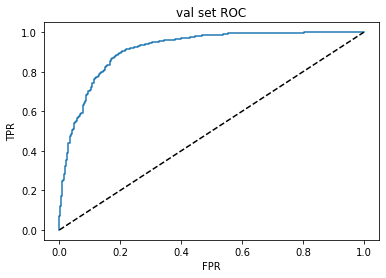

,metric,value
0,accuracy,0.84733
1,precision,0.81579
2,recall,0.89183
3,auc,0.91440
4,F1_score,0.85212


In [56]:
rf_3 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[2], n_jobs =2, random_state = 9660)
rf_3.fit(train_x, train_y)
## evaluation for train set
rf3_train_df = tree_eva(x = train_x, y = train_y, model = rf_3, train_val = 'train')
rf3_train_df
## evaluation for val set
rf3_val_df = tree_eva(x = val_x, y = val_y, model = rf_3, train_val = 'val')
rf3_val_df 

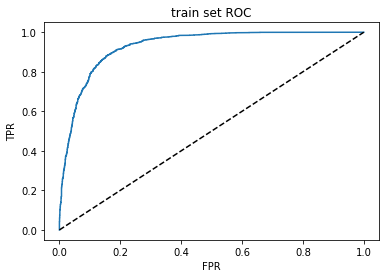

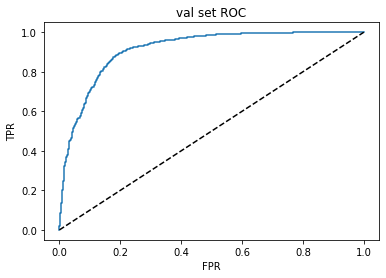

,metric,value
0,accuracy,0.84563
1,precision,0.81126
2,recall,0.89528
3,auc,0.91345
4,F1_score,0.85120


In [57]:
rf_4 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[3], n_jobs =2, random_state = 9660)
rf_4.fit(train_x, train_y)
## evaluation for train set
rf4_train_df = tree_eva(x = train_x, y = train_y, model = rf_4, train_val = 'train')
rf4_train_df
## evaluation for val set
rf4_val_df = tree_eva(x = val_x, y = val_y, model = rf_4, train_val = 'val')
rf4_val_df 

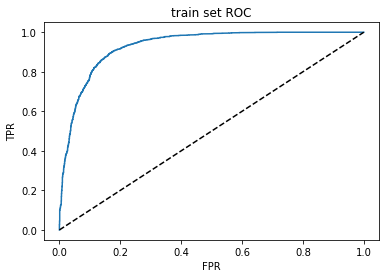

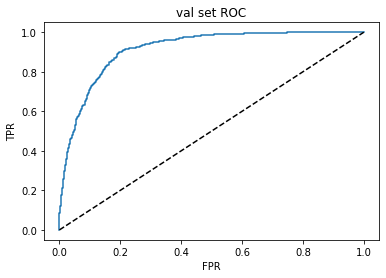

,metric,value
0,accuracy,0.84847
1,precision,0.81551
2,recall,0.89528
3,auc,0.91421
4,F1_score,0.85354


In [58]:
rf_5 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[4], n_jobs =2, random_state = 9660)
rf_5.fit(train_x, train_y)
## evaluation for train set
rf5_train_df = tree_eva(x = train_x, y = train_y, model = rf_5, train_val = 'train')
rf5_train_df
## evaluation for val set
rf5_val_df = tree_eva(x = val_x, y = val_y, model = rf_5, train_val = 'val')
rf5_val_df 

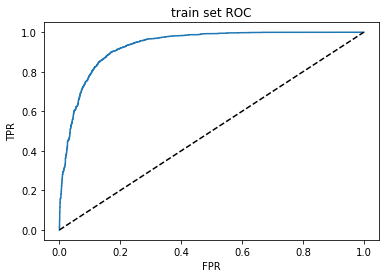

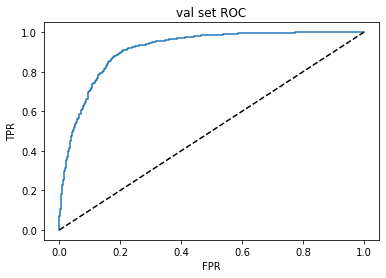

In [59]:
rf_6 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[5], n_jobs =2, random_state = 9660)
rf_6.fit(train_x, train_y)
## evaluation for train set
rf6_train_df = tree_eva(x = train_x, y = train_y, model = rf_6, train_val = 'train')

## evaluation for val set
rf6_val_df = tree_eva(x = val_x, y = val_y, model = rf_6, train_val = 'val')


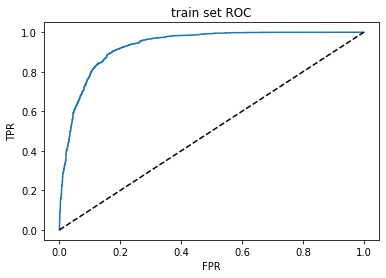

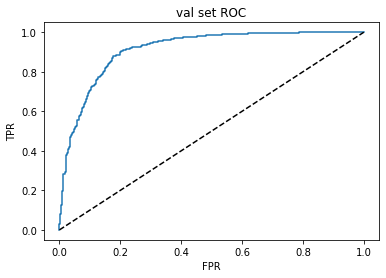

In [60]:
rf_7 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[6], n_jobs =2, random_state = 9660)
rf_7.fit(train_x, train_y)
## evaluation for train set
rf7_train_df = tree_eva(x = train_x, y = train_y, model = rf_7, train_val = 'train')

## evaluation for val set
rf7_val_df = tree_eva(x = val_x, y = val_y, model = rf_7, train_val = 'val')


In [ ]:
rf_7 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[6], n_jobs =2, random_state = 9660)
rf_7.fit(train_x, train_y)
## evaluation for train set
rf7_train_df = tree_eva(x = train_x, y = train_y, model = rf_7, train_val = 'train')

## evaluation for val set
rf7_val_df = tree_eva(x = val_x, y = val_y, model = rf_7, train_val = 'val')

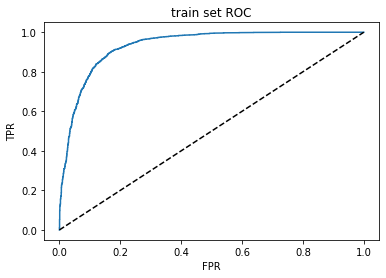

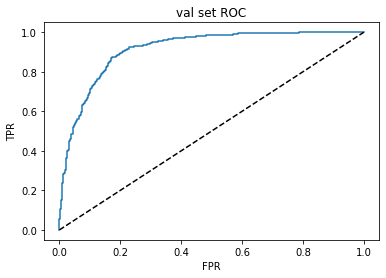

In [61]:
rf_8 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[7], n_jobs =2, random_state = 9660)
rf_8.fit(train_x, train_y)
## evaluation for train set
rf8_train_df = tree_eva(x = train_x, y = train_y, model = rf_8, train_val = 'train')

## evaluation for val set
rf8_val_df = tree_eva(x = val_x, y = val_y, model = rf_8, train_val = 'val')

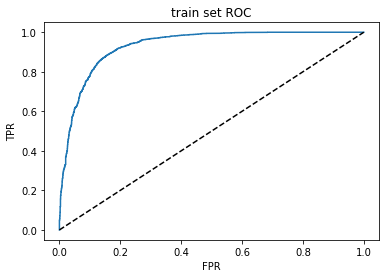

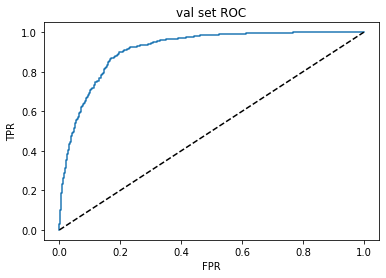

In [62]:
rf_9 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[8], n_jobs =2, random_state = 9660)
rf_9.fit(train_x, train_y)
## evaluation for train set
rf9_train_df = tree_eva(x = train_x, y = train_y, model = rf_9, train_val = 'train')

## evaluation for val set
rf9_val_df = tree_eva(x = val_x, y = val_y, model = rf_9, train_val = 'val')

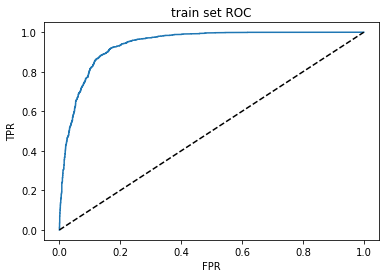

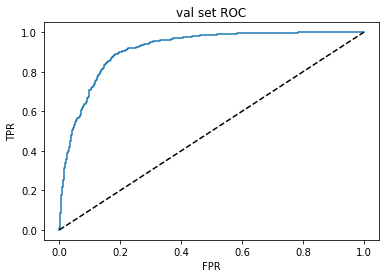

In [64]:
rf_10 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[9], n_jobs =2, random_state = 9660)
rf_10.fit(train_x, train_y)
## evaluation for train set
rf10_train_df = tree_eva(x = train_x, y = train_y, model = rf_10, train_val = 'train')

## evaluation for val set
rf10_val_df = tree_eva(x = val_x, y = val_y, model = rf_10, train_val = 'val')

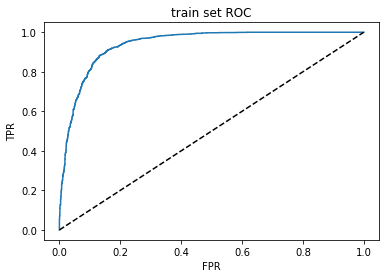

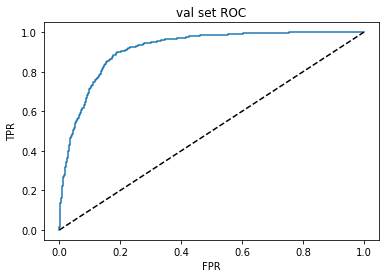

In [65]:
rf_11 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[10], n_jobs =2, random_state = 9660)
rf_11.fit(train_x, train_y)
## evaluation for train set
rf11_train_df = tree_eva(x = train_x, y = train_y, model = rf_11, train_val = 'train')

## evaluation for val set
rf11_val_df = tree_eva(x = val_x, y = val_y, model = rf_11, train_val = 'val')

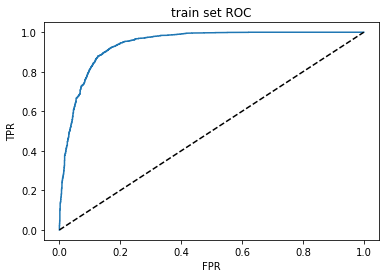

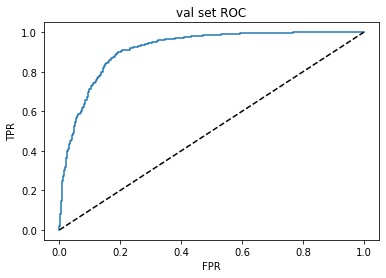

In [66]:
rf_12 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[11], n_jobs =2, random_state = 9660)
rf_12.fit(train_x, train_y)
## evaluation for train set
rf12_train_df = tree_eva(x = train_x, y = train_y, model = rf_12, train_val = 'train')

## evaluation for val set
rf12_val_df = tree_eva(x = val_x, y = val_y, model = rf_12, train_val = 'val')

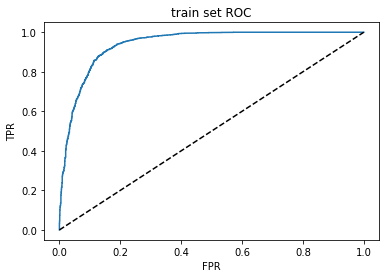

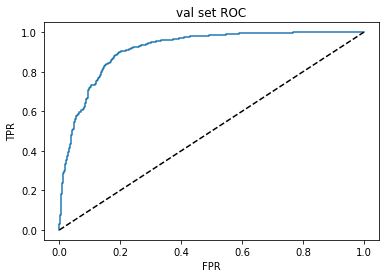

In [146]:
rf_13 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[12], n_jobs =2, random_state = 9660)
rf_13.fit(train_x, train_y)
## evaluation for train set
rf13_train_df = tree_eva(x = train_x, y = train_y, model = rf_13, train_val = 'train')

## evaluation for val set
rf13_val_df = tree_eva(x = val_x, y = val_y, model = rf_13, train_val = 'val')

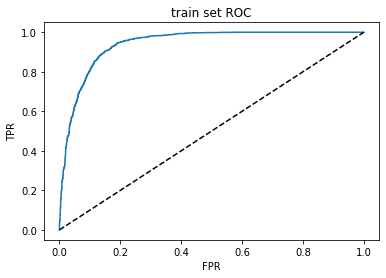

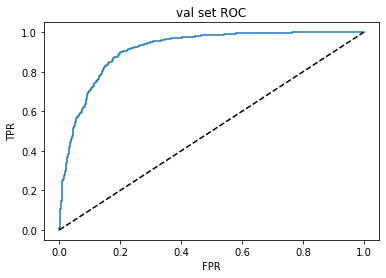

In [144]:
rf_14 = RandomForestClassifier(max_depth =7,
         n_estimators=150,
         min_samples_split=10,
         min_samples_leaf=10,
         max_features=4, max_samples = max_samples_list[13], n_jobs =2, random_state = 9660)
rf_14.fit(train_x, train_y)
## evaluation for train set
rf14_train_df = tree_eva(x = train_x, y = train_y, model = rf_14, train_val = 'train')

## evaluation for val set
rf14_val_df = tree_eva(x = val_x, y = val_y, model = rf_14, train_val = 'val')


In [140]:
## summarize the model metrics for comparison
train_metric = pd.concat([rf1_train_df, 
                         rf2_train_df.value,
                         rf3_train_df.value,
                         rf4_train_df.value,
                         rf5_train_df.value,
                         rf6_train_df.value,
                         rf7_train_df.value,
                         rf8_train_df.value,
                         rf9_train_df.value,
                         rf10_train_df.value,
                         rf11_train_df.value,
                         rf12_train_df.value,
                         rf13_train_df.value,
                         rf14_train_df.value], axis = 1) 
train_metric.columns = ["metric"]+max_samples_list

In [147]:

train_metric = train_metric.T
train_metric

,0,1,2,3,4
metric,accuracy,precision,recall,auc,F1_score
0.16,0.86034,0.83104,0.90663,0.92869,0.86719
0.17,0.86302,0.83482,0.90711,0.92950,0.86946
0.18,0.86253,0.83201,0.91050,0.93080,0.86948
0.19,0.86180,0.83003,0.91195,0.93051,0.86906
0.2,0.86277,0.83385,0.90808,0.93108,0.86938
0.21,0.86131,0.83134,0.90856,0.93196,0.86824
0.22,0.86277,0.83267,0.91001,0.93130,0.86963
0.23,0.86496,0.83660,0.90905,0.93250,0.87132
0.24,0.86204,0.83127,0.91050,0.93251,0.86908


In [148]:
train_metric.columns = train_metric.iloc[0,:]

train_metric =train_metric.iloc[1:,:]

In [149]:
for i in train_metric.columns:
    train_metric[i] = pd.to_numeric(train_metric[i], downcast="float")

<ipython-input-149-a81602530f77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metric[i] = pd.to_numeric(train_metric[i], downcast="float")


In [150]:
train_metric.sort_values(by="auc", ascending=False)

metric,accuracy,precision,recall,auc,F1_score
0.90000,0.87640,0.83995,0.93179,0.94088,0.88349
0.80000,0.87445,0.83968,0.92743,0.94055,0.88138
0.70000,0.87518,0.84079,0.92743,0.93988,0.88199
0.60000,0.87178,0.83742,0.92453,0.93937,0.87882
0.50000,0.87299,0.83837,0.92598,0.93866,0.88000
0.24000,0.86204,0.83127,0.91050,0.93251,0.86908
0.23000,0.86496,0.83660,0.90905,0.93250,0.87132
0.21000,0.86131,0.83134,0.90856,0.93196,0.86824
0.22000,0.86277,0.83267,0.91001,0.93130,0.86963
0.20000,0.86277,0.83385,0.90808,0.93108,0.86938


In [151]:
## summarize the model metrics for comparison
val_metric = pd.concat([rf1_val_df, 
                        rf2_val_df.value,
                        rf3_val_df.value,
                        rf4_val_df.value,
                        rf5_val_df.value,
                        rf6_val_df.value,
                        rf7_val_df.value,
                        rf8_val_df.value,
                        rf9_val_df.value,
                        rf10_val_df.value,
                        rf11_val_df.value,
                        rf12_val_df.value,
                        rf13_val_df.value,
                        rf14_val_df.value], axis = 1) 
val_metric.columns = ["metric"]+max_samples_list

In [152]:
val_metric = val_metric.T

val_metric.columns = val_metric.iloc[0,:]

val_metric = val_metric.iloc[1:,:]

In [153]:
for i in val_metric.columns:
    val_metric[i] = pd.to_numeric(val_metric[i], downcast="float")

val_metric.sort_values(by="auc", ascending=False)

metric,accuracy,precision,recall,auc,F1_score
0.60000,0.85017,0.81412,0.90219,0.91547,0.85590
0.70000,0.84960,0.81198,0.90449,0.91516,0.85574
0.50000,0.84733,0.81185,0.89873,0.91497,0.85309
0.80000,0.85187,0.81667,0.90219,0.91449,0.85730
0.18000,0.84733,0.81579,0.89183,0.91440,0.85212
0.21000,0.84620,0.81146,0.89643,0.91424,0.85183
0.20000,0.84847,0.81551,0.89528,0.91421,0.85354
0.24000,0.84960,0.81590,0.89758,0.91382,0.85479
0.23000,0.84506,0.81303,0.89068,0.91375,0.85008
0.90000,0.84904,0.81308,0.90104,0.91364,0.85480


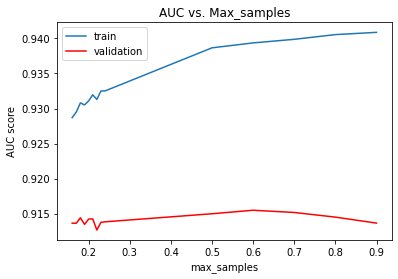

In [164]:
plt.plot(train_metric.index, train_metric.auc, label="train")
plt.plot(val_metric.index, val_metric.auc, "r", label= "validation")
plt.title("AUC vs. Max_samples")
plt.xlabel('max_samples')
plt.ylabel('AUC score')
plt.legend(loc="upper left")

Based on AUC of the trainging set, the model with max_samples of 0.9 performs best, but for the validation set, AUC drops to much lower, the model with max_samples of 0.6 performs best for the validation set.
When varying the max_samples, it appears higher max_samples performs better for the training set. But it appears random for the validation set. In general, training set performs better than the validation set. The difference is more obvious when max_samples getting larger.

## Suppose you want to build a model to predict if someone will click on an ad. Based off what we've covered so far in this class, how would you set up the modeling process? Include each major step and discuss potential ideas for features, modeling etc. also, include the pros/cons of each decision you make in the process.

1. Gathering the data. first we need to know what type of the data we need. Possible source would the profile about the customer and types of the ads. We need to know what are the important factor for the business. For example, an ad for commerical jet and an ad for soft drinks probabily will target different customers. We need to understand what types of data we need to get. Also, we need to know if there is any time or other restrains for the model.

2. Import, merge  and spliting data. For majority of the class, we are using csv files. But it's possible we might need to deal with other types of data. Then we need to merge data together. We also need to split the data into training and validation sets, 0.7/0.3 ratio is usually used.

3. Data cleaning . This could be an important step before modeling. There are several consideration here. First, find out the missing values and the proportion of missing values. Understand why they are missing and impute when it is possible. Then check for outlier. Coulnd use a certain quantile as a threshold for outliers. We need to be care when exluding outlier because it mgiht give us misleading result if we exclude some data without valid reason. Third, check if there is any inconsitant data. for example, mixed data types could indicate there might be some inconsistancy in the dataset. Depends on the model, some data might need to be normalized before modeling.

4. Exploratory data analysis and summary statistics. Using matplotlib or seaborn to do nesseary plots to help us understant the data better. Heatmap is very helpful to identify correlated features.

5. feature engineering and feature selection. We might need to do some engineering of the features. Datetime data needs to do some tranformation before we can using it for modeling. This step very likely needs to be repeated several time when we doing the modeling process in order to improve the model performance.

6. Baseline models. After we gain sufficient understanding of the data, we may be able to do an initial model as a baseline. For this click on an ad, it is a binary classification problem, a logistic regression model would be a good choice for baseline.

7. Modeling and hyperparameters tuning. We might need to try several different models to compare the performance. Logistic regression and naive bayes would be fast and less computational intensive, but tree based model and neutral network might have better result. Complex models also tends to have more hyperparameters to be tuned. We can use cross validaion to tune the hyperparameters.We need to check if there is any overfiting issue and adjust according. Overfitted model doesn't generalized well on the validation set.

8. evaluation and optimazation. Depends on the bussiness setting, we might need different metrics for evaluation. For classification problem, AUC, F-1 score, precision, recall are common metrics to be considered. Since we are doing a classification problem, we probably needs to adjust the probability threshold to get the optimal model. 

9. Testing the model. This part is not covered in class but I think it might be nessary. For industrial manufacturing, we usually run a 'line trial' in plant after a product was developed in lab. I think this step might be nessary for data enigineering too. I think it would be benefitial to test the model with real world data before deploy it. 

10. Deployment and monitoring. After the model is deployed, we need to continue monitor the performance and the data source. Check if there is any changes in the data source compare with the data we used to train the model. Is there any inconsistancy of the model performance? What insight we can derive from the model?